Loaded model from disk
Found 7178 images belonging to 7 classes.
113/113 [==============================] - 8s 71ms/step
-----------------------------------------------------------------
[[105  10 130 251 164 183 115]
 [ 11   0   8  33  24  20  15]
 [115  11 147 264 179 204 104]
 [214  23 222 453 321 345 196]
 [126  16 164 334 196 240 157]
 [132  15 147 330 238 238 147]
 [ 84  11  97 227 160 151 101]]


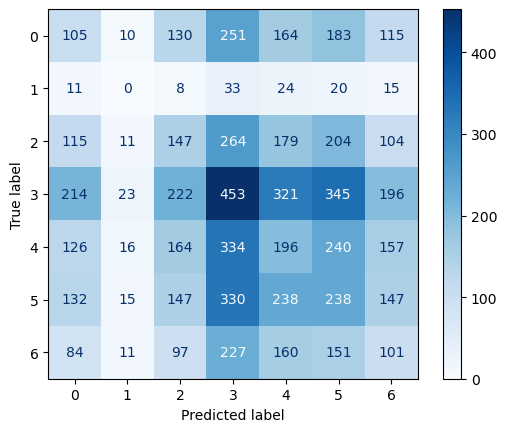

-----------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.13      0.11      0.12       958
           1       0.00      0.00      0.00       111
           2       0.16      0.14      0.15      1024
           3       0.24      0.26      0.25      1774
           4       0.15      0.16      0.16      1233
           5       0.17      0.19      0.18      1247
           6       0.12      0.12      0.12       831

    accuracy                           0.17      7178
   macro avg       0.14      0.14      0.14      7178
weighted avg       0.17      0.17      0.17      7178



In [3]:

import numpy as np
from keras.models import model_from_json
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report,ConfusionMatrixDisplay


emotion_dict = {0: "Angry", 1: "Disgusted", 2: "Fearful", 3: "Happy", 4: "Neutral", 5: "Sad", 6: "Surprised"}

# load json and create model
json_file = open('model/emotion_model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
emotion_model = model_from_json(loaded_model_json)

# load weights into new model
emotion_model.load_weights("model/emotion_model.h5")
print("Loaded model from disk")

# Initialize image data generator with rescaling
test_data_gen = ImageDataGenerator(rescale=1./255)

# Preprocess all test images
test_generator = test_data_gen.flow_from_directory(
        'data/test',
        target_size=(48, 48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')

# do prediction on test data
predictions = emotion_model.predict(test_generator)

# see predictions
# for result in predictions:
#     max_index = int(np.argmax(result))
#     print(emotion_dict[max_index])

print("-----------------------------------------------------------------")
# confusion matrix
c_matrix = confusion_matrix(test_generator.classes, predictions.argmax(axis=1))
print(c_matrix)
cm_display = ConfusionMatrixDisplay(confusion_matrix=c_matrix, display_labels=emotion_dict)
cm_display.plot(cmap=plt.cm.Blues)
plt.show()

# Classification report
print("-----------------------------------------------------------------")
print(classification_report(test_generator.classes, predictions.argmax(axis=1)))






Loaded model from disk
Found 7178 images belonging to 7 classes.
113/113 [==============================] - 1509s 13s/step
[[ 11   8 423 235 101 110  70]
 [  0   0  54  29   9  14   5]
 [ 18   6 433 271 103 126  67]
 [ 20   6 726 479 206 221 116]
 [ 12   6 537 300 144 145  89]
 [ 11   7 521 335 146 152  75]
 [  8   9 347 220  93  95  59]]


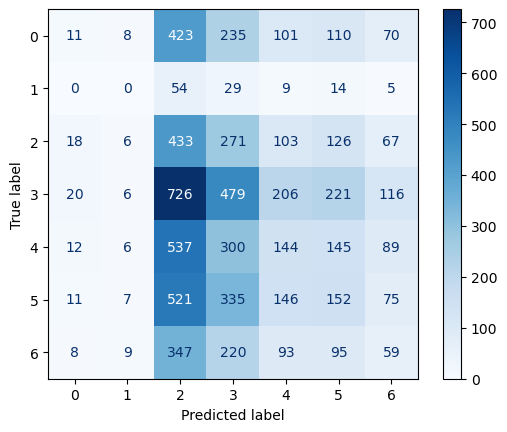

              precision    recall  f1-score   support

           0       0.14      0.01      0.02       958
           1       0.00      0.00      0.00       111
           2       0.14      0.42      0.21      1024
           3       0.26      0.27      0.26      1774
           4       0.18      0.12      0.14      1233
           5       0.18      0.12      0.14      1247
           6       0.12      0.07      0.09       831

    accuracy                           0.18      7178
   macro avg       0.14      0.14      0.12      7178
weighted avg       0.18      0.18      0.16      7178



In [8]:
import numpy as np
from keras.models import model_from_json
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

# Define the emotion dictionary
emotion_dict = {0: "angry", 1: "disgust", 2: "fear", 3: "happy", 4: "neutral", 5: "sad", 6: "surprise"}

# Load the JSON file to create the model architecture
json_file = open('model/emotion_model1.json', 'r')
loaded_model_json = json_file.read()
json_file.close()

# Create the model from the loaded JSON
emotion_model = model_from_json(loaded_model_json)

# Load the trained weights into the model
emotion_model.load_weights("model/emotion_model1.h5")  # Corrected filename
print("Loaded model from disk")

# Initialize image data generator with rescaling
test_data_gen = ImageDataGenerator(rescale=1./255)

# Preprocess all test images
test_generator = test_data_gen.flow_from_directory(
        'data/test',
        target_size=(224, 224),  # Adjust the target size according to your model
        batch_size=64,
        class_mode='categorical')

# Perform prediction on test data
predictions = emotion_model.predict(test_generator)

# Calculate confusion matrix
c_matrix = confusion_matrix(test_generator.classes, predictions.argmax(axis=1))
print(c_matrix)

# Plot confusion matrix
cm_display = ConfusionMatrixDisplay(confusion_matrix=c_matrix, display_labels=emotion_dict)
cm_display.plot(cmap=plt.cm.Blues)
plt.show()

# Print classification report
print(classification_report(test_generator.classes, predictions.argmax(axis=1)))
